In [1]:
import os
import sys

#python-data-analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#tensorflow package
import tensorflow as tf

#others
import time
import joblib

#suppress warnings
import warnings
warnings.filterwarnings('ignore')


In [2]:
#We start by using a small subset
col_names=['Pt0','Pt1','Pt2','NBJet','MET','MaxDphi_LMet','MaxDphi_LL','MinDphi_LL','LLPairPt','Mt0','Mt1','Mt2']
cols = [0,1,2,4,5,13,15,16,20,24,25,26]


In [3]:
WZBk = pd.read_csv('inputs/T3L_2017_WZ_100K.txt',sep=' ',index_col=None, usecols=cols,names=col_names)
#WZBk['label']=1

ZZBk = pd.read_csv('inputs/T3L_2017_ZZ_100K.txt',sep=' ',index_col=None, usecols=cols,names=col_names)
#ZZBk['label']=0

TTBk = pd.read_csv('inputs/T3L_2017_TTZ_100K.txt',sep=' ',index_col=None, usecols=cols,names=col_names)
#TTBk['label']=2

In [4]:

modelh5file="best_model_multiclass.h5"
mymodel = tf.keras.models.load_model(f"modeldata/{modelh5file}")
mymodel.load_weights(f"modeldata/{modelh5file}")

myscaler= joblib.load("modeldata/scaler_multiclass.save")


In [43]:
mybins = np.arange(0,1.05,0.05)

## Plot scores of a specific process in all output neurons

In [29]:
def processdf(df,dfname):
    df = myscaler.transform(df)    
    nnscore = mymodel.predict(df,batch_size=100000)
    
    plt.figure(figsize=(8,6))
    plt.hist(nnscore[:,0],bins=mybins,histtype='step',label='ZZneuron',linewidth=3,color='xkcd:red',density=False,log=False)
    plt.hist(nnscore[:,1],bins=mybins,histtype='step',label='WZneuron',linewidth=3,color='xkcd:green',density=False,log=False)
    plt.hist(nnscore[:,2],bins=mybins,histtype='step',label='TTZneuron',linewidth=3,color='xkcd:blue',density=False,log=False)
    plt.legend(loc='upper center')
    plt.xlabel('Score',fontsize=20)
    plt.ylabel('Events',fontsize=20)
    plt.title(f'NN Output for {dfname}',fontsize=20)
    plt.xticks([0.0,0.2,0.4,0.6,0.8,1.0],fontsize=12)
    plt.yticks(fontsize=12)
    plt.show() 



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step


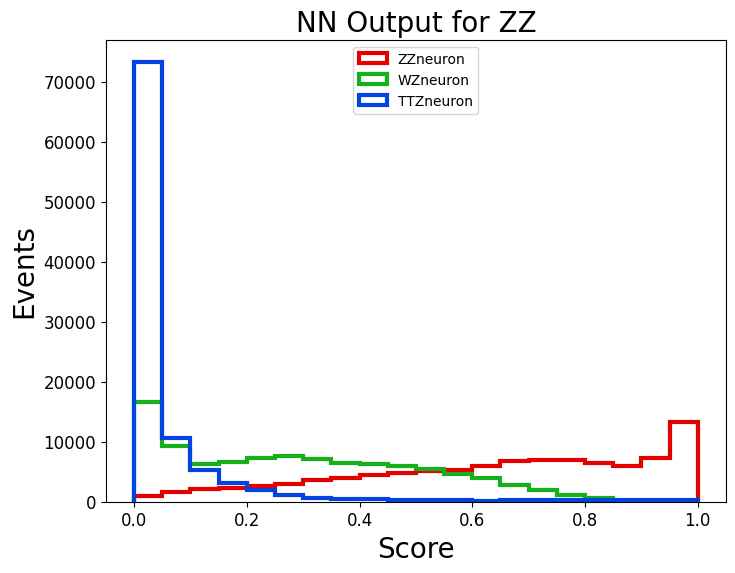

In [34]:
processdf(ZZBk,'ZZ')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 307ms/step


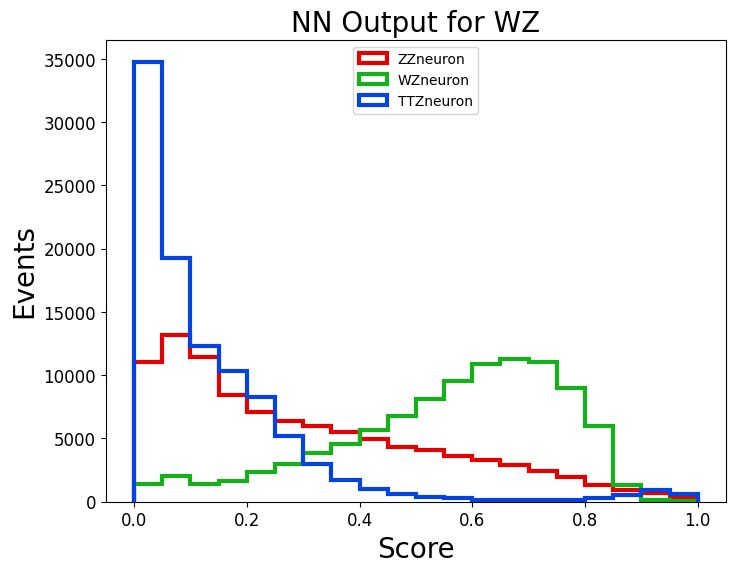

In [35]:
processdf(WZBk,'WZ')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step


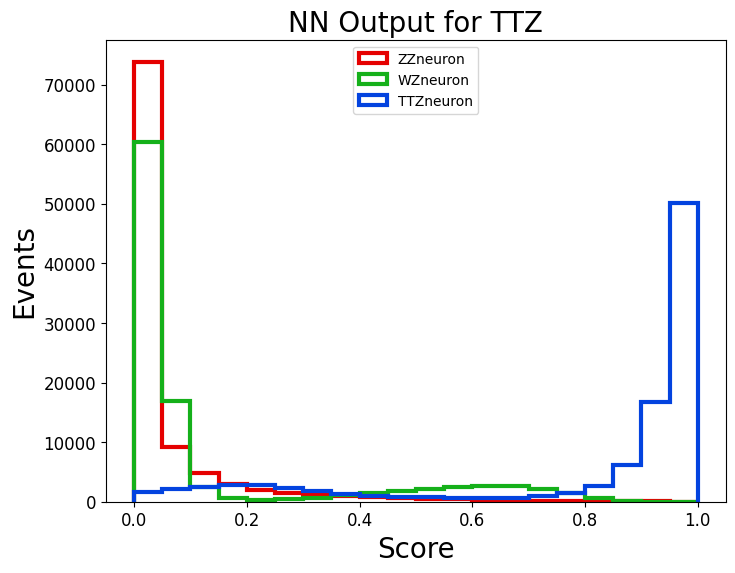

In [33]:
processdf(TTBk,'TTZ')

## Plot score of all the processes at a specific neuron

In [47]:
#This function takes a list of dataframes and plots a specific score for it
def processdflist(dflist,dfnames,proclabel):

    plt.figure(figsize=(8,6))
    for index, df in enumerate(dflist):
        df = myscaler.transform(df)    
        nnscore = mymodel.predict(df,batch_size=100000)
        plt.hist(nnscore[:,proclabel],bins=mybins,histtype='step',label=dfnames[index],
                 linewidth=3,color=proc_color[index],density=False,log=False)
        
    plt.legend(loc='upper center')
    plt.xlabel('Score',fontsize=20)
    plt.ylabel('Events',fontsize=20)
    plt.title(f'{node_label[proclabel]} NN Output',fontsize=20)
    plt.xticks([0.0,0.2,0.4,0.6,0.8,1.0],fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()

In [48]:
alldfs     = [WZBk,ZZBk,TTBk]
alldfnames = ['WZ','ZZ','TTZ']
proc_color = ['green','red','blue']
node_label = ['ZZneuron','WZneuron','TTZneuron']

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 355ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


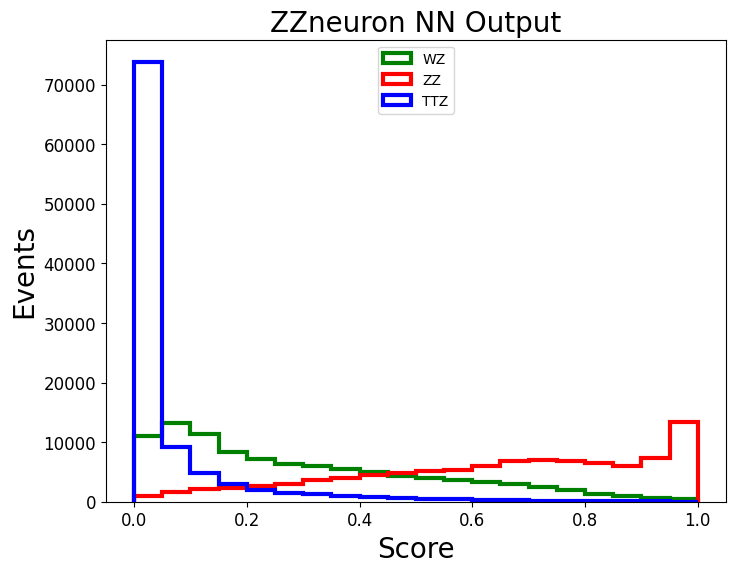

In [49]:
processdflist(alldfs,alldfnames,0)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


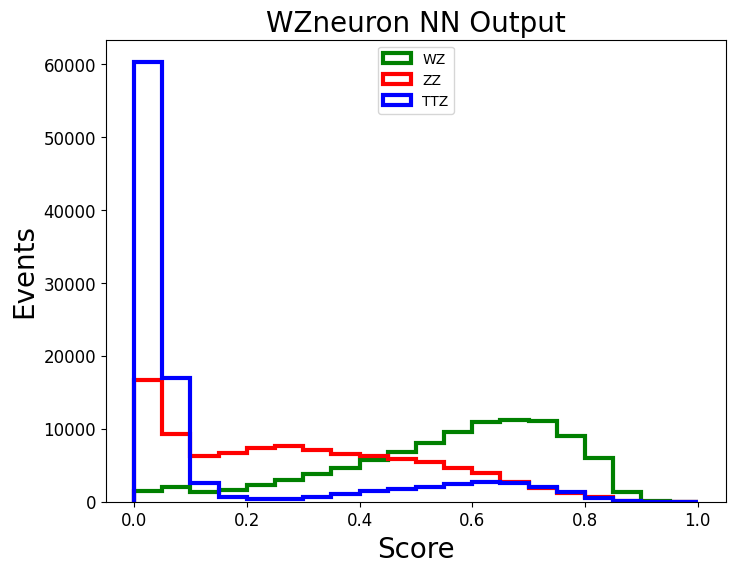

In [50]:
processdflist(alldfs,alldfnames,1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


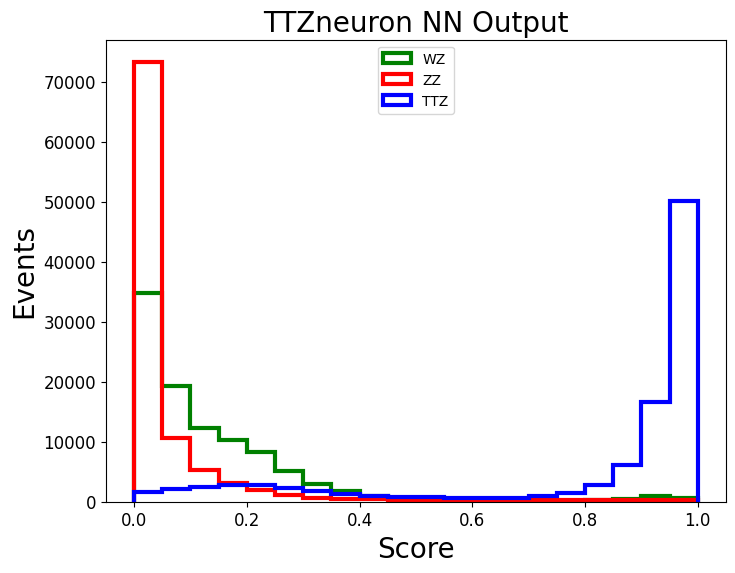

In [51]:
processdflist(alldfs,alldfnames,2)